# Classify whether the image show acid or base

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
from importlib import reload
%matplotlib inline

In [2]:
df = LoadData(44).load_data()
df = shuffle(df)
df.head()

no image
no image
no image
no image
no image
no image
no image


,blue,green,red,label
353,168,81,55,11
38,107,180,34,8
113,117,182,43,8
19,0,242,254,4
336,45,147,36,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 353 to 572
Data columns (total 4 columns):
blue     653 non-null int32
green    653 non-null int32
red      653 non-null int32
label    653 non-null int32
dtypes: int32(4)
memory usage: 15.3 KB


### Split data into two bins <0,7) - acid, <7,14> - base

In [4]:
def label(row):
    if row['label'] < 7:
        return 0 # acid
    else: 
        return 1 # base
df['class'] = df.apply(lambda row: label(row), axis=1)
df.drop('label', axis=1, inplace=True)
df.head()

,blue,green,red,class
353,168,81,55,1
38,107,180,34,1
113,117,182,43,1
19,0,242,254,0
336,45,147,36,1


In [5]:
df['class'].value_counts()

1    351
0    302
Name: class, dtype: int64

### Probability

In [6]:
n = df['class'].value_counts()[0] + df['class'].value_counts()[1]
n0 = df['class'].value_counts()[0]
n1 = df['class'].value_counts()[1]

p_0 = n0 / n 
p_1 = n1 / n

print("Probliblity a priori for class\t 0 : {}\t 1: {}".format(round(p_0, 3), round(p_1, 3)))

Probliblity a priori for class	 0 : 0.462	 1: 0.538


### Calculate mean of each class 

In [7]:
# acid 
m_blue_acid = df[df['class'] == 0]['blue'].mean()
m_green_acid = df[df['class'] == 0]['green'].mean()
m_red_acid = df[df['class'] == 0]['red'].mean()
# base 
m_blue_base = df[df['class'] == 1]['blue'].mean()
m_green_base = df[df['class'] == 1]['green'].mean()
m_red_base = df[df['class'] == 1]['red'].mean()

# mean acid vector
m_acid = np.array([m_red_acid, m_green_acid, m_blue_acid]).T
m_acid_matrix = np.matrix(m_acid)
# mean base vector
m_base = np.array([m_red_base, m_green_base, m_blue_base]).T
m_base_matrix = np.matrix(m_base)

# only for plotly
m_acid_df = pd.DataFrame(data=m_acid).T
m_acid_df.columns = ['red', 'green', 'blue']
m_base_df = pd.DataFrame(data=m_base).T
m_base_df.columns = ['red', 'green', 'blue']


print("Mean for acid:\n red - {}\n green - {}\n blue - {}".
      format(round(m_red_acid,3), round(m_green_acid,3), round(m_blue_acid,3)))
print("Mean for base:\n red - {}\n green - {}\n blue - {}".
      format(round(m_red_base,3), round(m_green_base,3), round(m_blue_base,3)))

Mean for acid:
 red - 198.712
 green - 150.97
 blue - 26.662
Mean for base:
 red - 53.496
 green - 112.134
 blue - 143.177


### Calculating covariance

**calculating by hand**

In [8]:
acid_i = np.matrix(df[df['class'] == 0].drop('class', axis=1).values)
base_i = np.matrix(df[df['class'] == 1].drop('class', axis=1).values)
acid_cov_matrix = np.zeros((3, 3))
base_cov_matrix = np.zeros((3, 3))
for i in range(n0):
    acid_cov_matrix += np.dot((acid_i[i].T - m_acid_matrix.T),(acid_i[i] - m_acid_matrix))
for i in range(n1):
    base_cov_matrix += np.dot((base_i[i].T - m_base_matrix.T),(base_i[i] - m_base_matrix))
acid_cov_matrix = acid_cov_matrix / (n0 - 1)
base_cov_matrix = base_cov_matrix / (n1 - 1)
print('Acid covariance matrix: \n{} \nBase covariance matrix: \n{}'.format(acid_cov_matrix, base_cov_matrix))

Acid covariance matrix: 
[[ 30303.56244087   -113.44199248 -30157.26288751]
 [  -113.44199248   5958.48748102   -876.70961035]
 [-30157.26288751   -876.70961035  33361.59030604]] 
Base covariance matrix: 
[[11721.24224664 -1083.8780057  -8176.92992267]
 [-1083.8780057   3964.32201872  -565.20656899]
 [-8176.92992267  -565.20656899 10084.70708995]]


**with *Pandas* function**

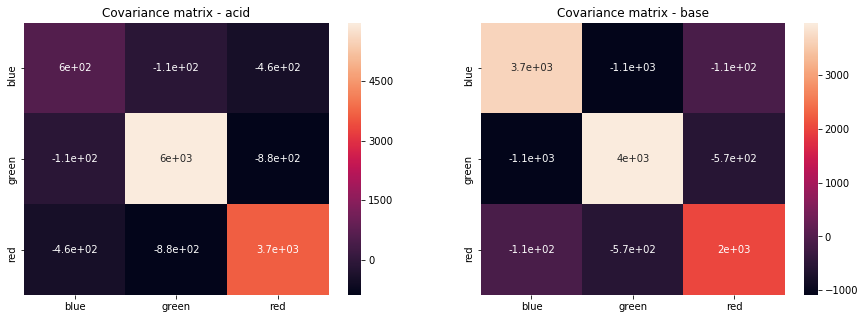

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# for acid
cov_acid = df[df['class'] == 0].drop('class', axis=1).cov()
# for base
cov_base = df[df['class'] == 1].drop('class', axis=1).cov()

fig, axn = plt.subplots(1, 2, figsize=(15,5))
sns.heatmap(cov_acid, 
            xticklabels=cov_acid.columns.values,
            yticklabels=cov_acid.columns.values,annot=True,ax=axn[0])
axn[0].set_title('Covariance matrix - acid')
sns.heatmap(cov_base, 
            xticklabels=cov_base.columns.values,
            yticklabels=cov_base.columns.values,annot=True,ax=axn[1])
axn[1].set_title('Covariance matrix - base')
plt.show()

### Visualization

In [10]:
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


acid = go.Scatter3d(
    x=df[df['class'] == 0]['blue'],
    y=df[df['class'] == 0]['red'],
    z=df[df['class'] == 0]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(255,0,0)',
                  line=dict(width=0)),
    name ='ACID'
)
base = go.Scatter3d(
    x=df[df['class'] == 1]['blue'],
    y=df[df['class'] == 1]['red'],
    z=df[df['class'] == 1]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(0,0,255)',
                  line=dict(width=0)),
    name ='BASE'
)

acid_mean = go.Scatter3d(
    x = m_acid_df['blue'],
    y = m_acid_df['green'],
    z = m_acid_df['red'],
    mode='markers',
    marker = dict(size=10,
                  color='rgb(255,20,0)',
                  line=dict(width=3)),
    name = "ACID_MEAN"
)

base_mean = go.Scatter3d(
    x = m_base_df['blue'],
    y = m_base_df['green'],
    z = m_base_df['red'],
    mode='markers',
    marker = dict(size=10,
                  color='rgb(0,20,255)',
                  line=dict(width=3)),
    name = "BASE_MEAN"
)

data = [acid, base, acid_mean, base_mean]
layout = go.Layout(
    title='PH-scale',
    scene = dict(
        xaxis = dict(title='blue'),
        yaxis = dict(title='red'),
        zaxis = dict(title='green'),)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='ph-scale')

### W matrix

*** 
W is an intragroup covariance matrix 
$$
    \begin{align}
    \large W = \frac{1}{n-2} \sum_{k=1}^{2} \left(n_k - 1\right) S_k
    \end{align}
$$
$S_k$ is a covariance matrix of each class, $n$ is a sum of every instances. 

**using calculated by hand matrixes**

In [11]:
W = ((n0 - 1) * acid_cov_matrix + (n1 - 1) * base_cov_matrix) / (n - 2)
W

array([[ 20313.06771279,   -635.18178453, -18339.87957308],
       [  -635.18178453,   4886.35551204,   -709.23485693],
       [-18339.87957308,   -709.23485693,  20847.13696406]])

**using *Pandas* matrixes**

In [12]:
W_pd = ((n0 - 1) * cov_acid + (n1 - 1) * cov_base) / (n - 2)
W_pd

,blue,green,red
blue,2244.704452,-635.181785,-271.516312
green,-635.181785,4886.355512,-709.234857
red,-271.516312,-709.234857,2778.773703


### $\hat{a}$ vector and $b$

\begin{align}
\large \hat{a} &= W^{-1} \left(mean_{2} - mean_{1}\right) \\
\large b &= - 0.5 \cdot \hat{a}^T \cdot \left(mean_{2} - mean_{1}\right)
\end{align}


**using calculated by hand matrixes**

In [13]:
hat_a = np.linalg.pinv(W)
hat_a = hat_a.dot(m_acid_matrix.T - m_base_matrix.T)
print(hat_a)

[[0.01343044]
 [0.01065004]
 [0.00658852]]


In [14]:
b = - 0.5 * hat_a.T
b = b.dot(m_acid_matrix.T - m_base_matrix.T)
print(b)

[[-0.79813446]]


In [15]:
hat_a_pd = pd.DataFrame(np.linalg.pinv(W_pd.values), W_pd.columns, W_pd.index).values
hat_a_pd = hat_a_pd.dot(m_acid_matrix.T - m_base_matrix.T)
print(hat_a_pd)

[[ 0.06399094]
 [ 0.01151425]
 [-0.03273872]]


In [16]:
b_pd = - 0.5 * hat_a_pd.T
b_pd = b_pd.dot(m_acid_matrix.T - m_base_matrix.T)
print(b_pd)

[[-6.77711155]]


### Calculate hypersurface parametrs

In [17]:
hyper_d = (0.5 * ((m_base_matrix - m_acid_matrix) * np.linalg.inv(W)) * (m_acid_matrix.T + m_base_matrix.T)).item(0)
hyper_a = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(W)).item(0)
hyper_b = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(W)).item(1)
hyper_c = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(W)).item(2)
print("a : {}\tb : {}\tc : {}\td : {}".format(hyper_a, hyper_b, hyper_c, hyper_d))

a : -0.0134304428936268	b : -0.01065003832795021	c : -0.0065885160829434975	d : -3.6541577131962604


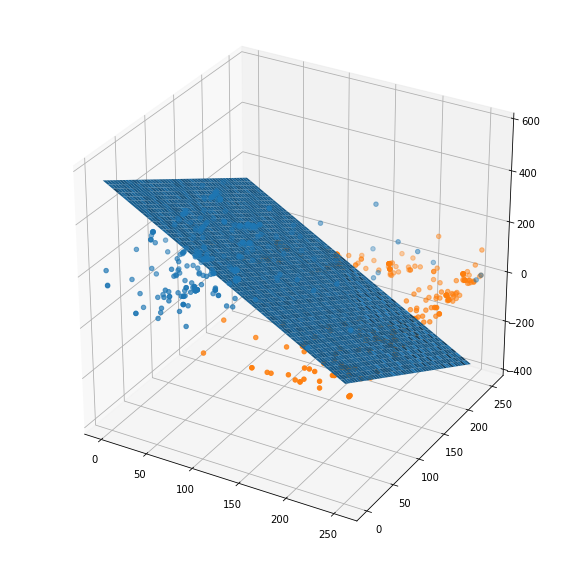

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os

def rotate(angle):
    ax.view_init(azim=angle)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

x = np.linspace(0, 250)
y = np.linspace(0, 250)

X,Y = np.meshgrid(x,y)
Z = (-hyper_a*X - hyper_b*Y + hyper_d) * (1. / hyper_c)

# plot the surface
ax.plot_surface(X, Y, Z) # use in animation
ax.scatter(df[df['class'] == 1]['red'],
    df[df['class'] == 1]['green'],
    df[df['class'] == 1]['blue'])
ax.scatter(df[df['class'] == 0]['red'],
    df[df['class'] == 0]['green'],
    df[df['class'] == 0]['blue'])
# plt.axis('off')
# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
# rot_animation.save('rotation1.gif', dpi=80, writer='imagemagick')
plt.show()

*the surface is supposed to split the data. I have to find a mistake*

In [19]:
# naive Bayes 
# LDA or QDA 
# random forest + graphs 

## Split data 

In [20]:
X = np.array(df.drop('class', axis=1))
y = np.array(df['class'])
X.shape, y.shape

((653, 3), (653,))

## Linear discriminant analysis

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=True, tol=0.0001)

In [22]:
lda_matrix = lda.covariance_
print(lda_matrix)

[[2237.82939985 -633.23635793 -270.68471539]
 [-633.23635793 4871.38964524 -707.06262153]
 [-270.68471539 -707.06262153 2770.26291068]]


**try to use this matrix to create surface**

In [23]:
lda_d = (0.5 * ((m_base_matrix - m_acid_matrix) * np.linalg.inv(lda_matrix)) *(m_acid_matrix.T + m_base_matrix.T)).item(0)
lda_a = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(lda_matrix)).item(0)
lda_b = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(lda_matrix)).item(1)
lda_c = ((m_base_matrix - m_acid_matrix) * np.linalg.inv(lda_matrix)).item(2)
print("a : {}\tb : {}\tc : {}\td : {}".format(lda_a, lda_b, lda_c, lda_d))

a : -0.06418752969738849	b : -0.01154962666194203	c : 0.032839299713126505	d : -6.824974888168597


## Quadratic Discriminant Analysis

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=True, store_covariances=None, tol=0.0001)

In [25]:
qda_cov = qda.covariance_ 
qda_cov

[array([[ 604.13139425, -113.44199248, -457.83184088],
        [-113.44199248, 5958.48748102, -876.70961035],
        [-457.83184088, -876.70961035, 3662.15925942]]),
 array([[ 3655.59728124, -1083.8780057 ,  -111.28495726],
        [-1083.8780057 ,  3964.32201872,  -565.20656899],
        [ -111.28495726,  -565.20656899,  2019.06212454]])]

In [26]:
acid = go.Scatter3d(
    x=df[df['class'] == 0]['blue'],
    y=df[df['class'] == 0]['red'],
    z=df[df['class'] == 0]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(255,0,0)',
                  line=dict(width=0)),
    name ='ACID'
)
base = go.Scatter3d(
    x=df[df['class'] == 1]['blue'],
    y=df[df['class'] == 1]['red'],
    z=df[df['class'] == 1]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(0,0,255)',
                  line=dict(width=0)),
    name ='BASE'
)

x_line = np.linspace(0,200)
y_line = np.linspace(0,200)
X_surface, Y_surface = np.meshgrid(x_line, y_line)
Z = (-hyper_a*X_surface - hyper_b*Y_surface + hyper_d) * (1. / hyper_c)
Z_lda = (-lda_a*X_surface - lda_b*Y_surface + lda_d) * (1. / lda_c)

# something wrong with W matrix
surface = go.Surface(z=X_surface, x=Z, y=Y_surface, opacity=0.9, name ='SURFACE')
surface_lda = go.Surface(z=Y_surface, x=Z_lda, y=X_surface, opacity=0.9, name ='SURFACE_lda')

data_surface = [acid, base, surface, surface_lda]
layout = go.Layout(
    title='Comparation between surfaces',
    scene = dict(
        xaxis = dict(title='blue'),
        yaxis = dict(title='red'),
        zaxis = dict(title='green'),)
)
fig = go.Figure(data=data_surface, layout=layout)
py.iplot(fig,filename='ph-surface')

In [27]:
lda.predict_proba([[255,0,0]]) # only blue -> base 

array([[2.71744595e-07, 9.99999728e-01]])

## Dimensionality reduction

### PCA

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced[:10]

array([[ 109.41923893,   28.35477822],
       [  64.14543138,  -76.66068069],
       [  62.96613054,  -74.20431392],
       [-182.14760681,  -62.13599288],
       [  32.8073305 ,  -51.34609725],
       [-170.39682802,  -33.53336953],
       [-119.29835474,   43.93005847],
       [  -9.06334825,  105.13012258],
       [-149.825545  ,   15.73573144],
       [  82.50158028,   17.91045316]])

In [29]:
pca.explained_variance_ratio_

array([0.6280096 , 0.27274303])

**We loss 9.7% information**

In [30]:
1 - pca.explained_variance_ratio_.sum()

0.09924737111349757

In [31]:
def plot_after_dim_reduce(X_reduced):
    for i in range(len(y)):
        if y[i] == 0:
            plt.scatter(X_reduced[i, 0], X_reduced[i, 1], c='b')
        elif y[i] == 1:
            plt.scatter(X_reduced[i, 0], X_reduced[i, 1], c='r')
    plt.grid(True)
    plt.show()

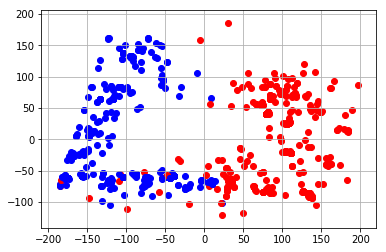

In [32]:
plot_after_dim_reduce(X_reduced)

### Incremental PCA

In [33]:
from sklearn.decomposition import IncrementalPCA

n_batches = 50
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced_inc_pca = inc_pca.fit_transform(X)

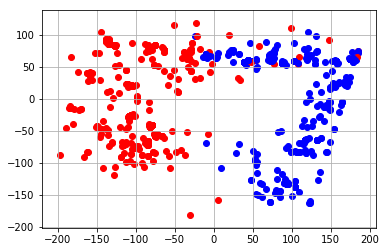

In [34]:
plot_after_dim_reduce(X_reduced_inc_pca)

In [35]:
X_recoverd_inc_pca = inc_pca.inverse_transform(X_reduced_inc_pca)
print(X_recoverd_inc_pca[:5])
print(X[:5])

[[158.04671146  77.51565429  48.09359638]
 [122.55424259 185.44507056  44.79280248]
 [121.9901172  183.74688932  46.46255043]
 [-26.4391579  232.74444933 235.65435524]
 [105.54402885 168.19463596  78.01038663]]
[[168  81  55]
 [107 180  34]
 [117 182  43]
 [  0 242 254]
 [ 45 147  36]]


### Kernel PCA

In [36]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_reduced_kernel_rbf = rbf_pca.fit_transform(X)

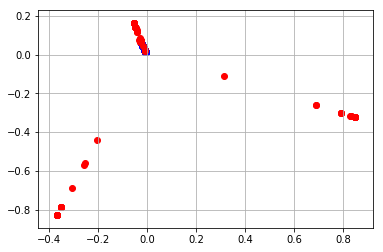

In [37]:
plot_after_dim_reduce(X_reduced_kernel_rbf)

**with grid search**

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid", "poly", "linear"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid', 'poly', 'linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'linear'}


In [40]:
lin_pca = KernelPCA(n_components=2, kernel='linear', gamma=0.03)
X_reduced_kernel_lin = lin_pca.fit_transform(X)

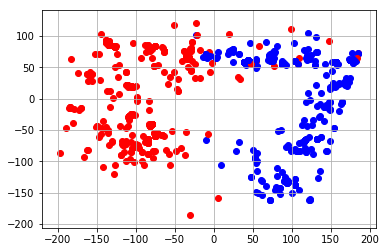

In [41]:
plot_after_dim_reduce(X_reduced_kernel_lin)

### LLE

In [42]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_reduced_lle = lle.fit_transform(X)

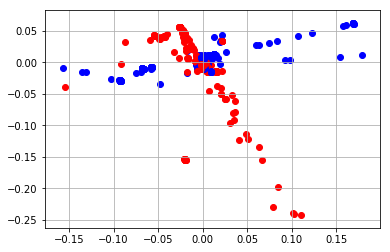

In [43]:
plot_after_dim_reduce(X_reduced_lle)

### MDS

In [44]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

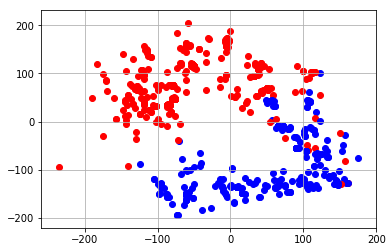

In [45]:
plot_after_dim_reduce(X_reduced_mds)

### Isomap

In [46]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

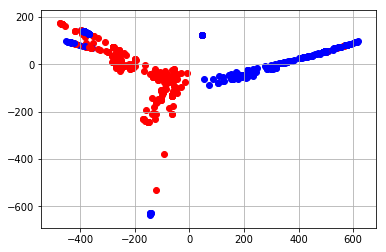

In [47]:
plot_after_dim_reduce(X_reduced_isomap)

### t-SNE

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

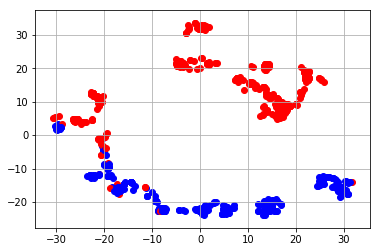

In [49]:
plot_after_dim_reduce(X_reduced_tsne)

## Split data and predict 

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_curve

y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy : {}'.format(acc))

Accuracy : 0.9389312977099237


**Confusion matrix**

In [53]:
confusion_matrix(y_test, y_pred)

array([[56,  2],
       [ 6, 67]], dtype=int64)

**ROC curve**

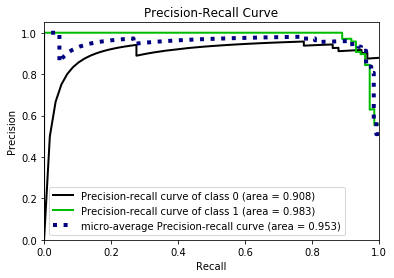

In [54]:
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

y_pred_proba = log_reg.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_pred_proba)
plt.show()

**Logistic Regression with dimensinality reduction (Linear PCA)**

In [55]:
X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(X_reduced_kernel_lin, y, test_size=0.2)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_dr, y_train_dr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_pred_dr = log_reg.predict(X_test_dr)
acc_dr = accuracy_score(y_test_dr, y_pred_dr)
print('Accuracy : {}'.format(acc_dr))

Accuracy : 0.9312977099236641


In [57]:
confusion_matrix(y_test_dr, y_pred_dr)

array([[46,  7],
       [ 2, 76]], dtype=int64)

**Logistic Regression with dimensinality reduction (MDS)**

In [58]:
X_train_mds, X_test_mds, y_train_mds, y_test_mds = train_test_split(X_reduced_mds, y, test_size=0.2)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_mds, y_train_mds)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
y_pred_mds = log_reg.predict(X_test_mds)
acc_mds = accuracy_score(y_test_mds, y_pred_mds)
print('Accuracy : {}'.format(acc_mds))

Accuracy : 0.9465648854961832


In [60]:
confusion_matrix(y_test_mds, y_pred_mds)

array([[61,  5],
       [ 2, 63]], dtype=int64)

**Logistic Regression with dimensinality reduction (t-SNE)**

In [61]:
X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_reduced_tsne, y, test_size=0.2)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_tsne, y_train_tsne)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_pred_tsne = log_reg.predict(X_test_tsne)
acc_tsne = accuracy_score(y_test_tsne, y_pred_tsne)
print('Accuracy : {}'.format(acc_tsne))

Accuracy : 0.9236641221374046


In [63]:
confusion_matrix(y_test_tsne, y_pred_tsne)

array([[50,  7],
       [ 3, 71]], dtype=int64)